<a href="https://colab.research.google.com/github/GilbertHD/HD2103/blob/main/HD_06_02_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import dependancies

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
# ./gdrive/MyDrive/DATA/STOCK/

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import matplotlib.pyplot as plt
%matplotlib inline

## Load dataset

In [ ]:
# Reading the saved data pickle file
df_stocks = pd.read_pickle('./gdrive/MyDrive/DATA/STOCK/pickled_ten_year_filtered_lead_para.pkl')

In [ ]:
df_stocks.head()

,close,adj close,articles
2011-01-04,5.334,5.334,. Maxim Recruits a Readership in Uniform. Amon...
2011-01-05,5.366,5.366,. Grasping Another’s Point of View at an Early...
2011-01-06,5.576,5.576,. A Turnaround for Anadarko. Don’t Call It a C...
2011-01-07,5.648,5.648,". Health Spending Rose in ’09, but at Low Rate..."
2011-01-08,5.662,5.662,. MBIA Fights Banks for Its Life. Obama Plan A...


## Convert adj close price into integer format

In [ ]:
df_stocks['prices'] = df_stocks['adj close'].apply(np.int64)

In [ ]:
# selecting the prices and articles
df_stocks = df_stocks[['prices', 'articles']]

In [ ]:
df_stocks.head()

,prices,articles
2011-01-04,5,. Maxim Recruits a Readership in Uniform. Amon...
2011-01-05,5,. Grasping Another’s Point of View at an Early...
2011-01-06,5,. A Turnaround for Anadarko. Don’t Call It a C...
2011-01-07,5,". Health Spending Rose in ’09, but at Low Rate..."
2011-01-08,5,. MBIA Fights Banks for Its Life. Obama Plan A...


## Remove letfmost dots from news article headlines

In [ ]:
df_stocks['articles'] = df_stocks['articles'].map(lambda x: x.lstrip('.-'))

In [ ]:
df_stocks.head()

,prices,articles
2011-01-04,5,Maxim Recruits a Readership in Uniform. Among...
2011-01-05,5,Grasping Another’s Point of View at an Early ...
2011-01-06,5,A Turnaround for Anadarko. Don’t Call It a Cr...
2011-01-07,5,"Health Spending Rose in ’09, but at Low Rate...."
2011-01-08,5,MBIA Fights Banks for Its Life. Obama Plan Ai...


## Sentiment analysis

In [ ]:
df = df_stocks[['prices']].copy()
df.head()

,prices
2011-01-04,5
2011-01-05,5
2011-01-06,5
2011-01-07,5
2011-01-08,5


In [ ]:
df = df_stocks[['prices']].copy()

In [ ]:
# Adding new columns to the data frame
df["compound"] = ''
df["neg"] = ''
df["neu"] = ''
df["pos"] = ''

In [ ]:
df.head()

,prices,compound,neg,neu,pos
2011-01-04,5,,,,
2011-01-05,5,,,,
2011-01-06,5,,,,
2011-01-07,5,,,,
2011-01-08,5,,,,


## Sentiment Analysis

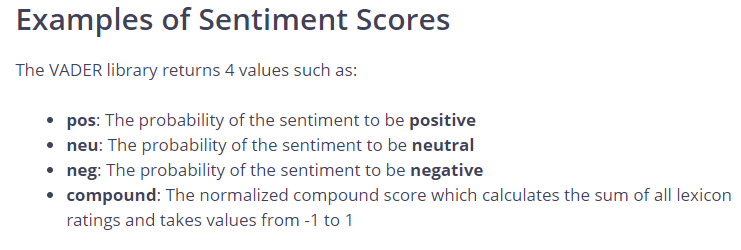

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import unicodedata
sid = SentimentIntensityAnalyzer()
for date, row in df_stocks.T.iteritems():
    try:
        sentence = unicodedata.normalize('NFKD', df_stocks.loc[date, 'articles']).encode('ascii','ignore')
        ss = sid.polarity_scores(str(sentence))
        #df.set_value(date, 'compound', ss['compound'])
        df.at[date, 'compound'] = ss['compound']
        df.at[date, 'neg'] = ss['neg']
        df.at[date, 'neu'] = ss['neu']
        df.at[date, 'pos'] = ss['pos']
    except TypeError:
        print (df_stocks.loc[date, 'articles'])
        print (date)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df.head()

,prices,compound,neg,neu,pos
2011-01-04,5,-0.9857,0.135,0.765,0.1
2011-01-05,5,-0.9958,0.192,0.752,0.056
2011-01-06,5,-0.9925,0.183,0.731,0.086
2011-01-07,5,-0.9951,0.209,0.706,0.085
2011-01-08,5,-0.9893,0.162,0.722,0.116


## Train base line model

### Split training and testing data

In [ ]:
train_start_date = '2011-01-01'
train_end_date = '2018-12-31'
test_start_date = '2019-01-01'
test_end_date = '2020-12-31'
train = df.loc[train_start_date : train_end_date]
test = df.loc[test_start_date:test_end_date]

### Split prediction labels for training and testing dataset 

In [ ]:
y_train = pd.DataFrame(train['prices'])
y_test = pd.DataFrame(test['prices'])

### Convert sentiment analysis score into numpy array

In [ ]:
sentiment_score_list = []
for date, row in train.T.iteritems():
    #sentiment_score = np.asarray([df.loc[date, 'compound'],
                                  #df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
    sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)

In [ ]:
sentiment_score_list = []
for date, row in test.T.iteritems():
    #sentiment_score = np.asarray([df.loc[date, 'compound'],
                                    #df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
    sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)

In [ ]:
!pip install treeinterpreter

https://coderzcolumn.com/tutorials/machine-learning/treeinterpreter-interpreting-tree-based-models-prediction-of-individual-sample

treeinterpreter - Interpreting Tree-Based Model's Prediction of Individual Sample

In [ ]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor()
rf.fit(numpy_df_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
print(rf.feature_importances_)

[0.53305815 0.46694185]


In [ ]:
prediction, bias, contributions = ti.predict(rf, numpy_df_test)
#print prediction
#print contributions

In [ ]:
rf.score(numpy_df_test,y_test)

-0.6559618556777316

In [ ]:
idx = pd.date_range(test_start_date, test_end_date)
predictions_df = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])

In [ ]:
predictions_df.head()

,prices
2019-01-01,54.832833
2019-01-02,41.889667
2019-01-03,56.520000
2019-01-04,46.600952
2019-01-05,53.335333


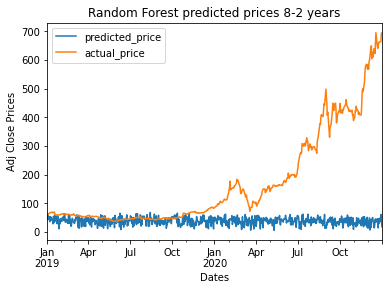

In [ ]:
ax = predictions_df.rename(columns=
                           {"prices": "predicted_price"}).plot(title=
                           'Random Forest predicted prices 8-2 years')
ax.set_xlabel("Dates")
ax.set_ylabel("Adj Close Prices")
fig = y_test.rename(columns={"prices": "actual_price"}).plot(ax = ax).get_figure()
fig.savefig("./gdrive/MyDrive/DATA/STOCK/random forest without smoothing.png")

# colors = ['332288', '88CCEE', '44AA99', '117733', '999933', 'DDCC77', 'CC6677', '882255', 'AA4499']

## Alignment of the testing dataset price value and pridicted values

In [ ]:
from datetime import datetime, timedelta
temp_date = test_start_date
average_last_5_days_test = 0
total_days = 10
for i in range(total_days):
    average_last_5_days_test += test.loc[temp_date, 'prices']
    # Converting string to date time
    temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
    # Reducing one day from date time
    difference = temp_date + timedelta(days=1)
    # Converting again date time to string
    temp_date = difference.strftime('%Y-%m-%d')
    #print temp_date
average_last_5_days_test = average_last_5_days_test / total_days
print (average_last_5_days_test)

temp_date = test_start_date
average_upcoming_5_days_predicted = 0
for i in range(total_days):
    average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
    # Converting string to date time
    temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
    # Adding one day from date time
    difference = temp_date + timedelta(days=1)
    # Converting again date time to string
    temp_date = difference.strftime('%Y-%m-%d')
    #print temp_date
average_upcoming_5_days_predicted = average_upcoming_5_days_predicted / total_days
print (average_upcoming_5_days_predicted)
#average train.loc['2013-12-31', 'prices'] - advpredictions_df.loc['2014-01-01', 'prices']
difference_test_predicted_prices = average_last_5_days_test - average_upcoming_5_days_predicted
print (difference_test_predicted_prices)

64.6
47.83171190476192
16.768288095238077


In [ ]:
predictions_df['prices'] = predictions_df['prices'] + difference_test_predicted_prices
predictions_df.head()

,prices
2019-01-01,71.601121
2019-01-02,58.657955
2019-01-03,73.288288
2019-01-04,63.369240
2019-01-05,70.103621


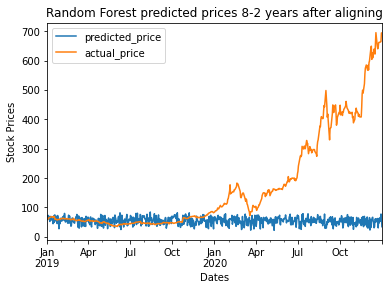

In [ ]:
ax = predictions_df.rename(columns={"prices": "predicted_price"}).plot(title='Random Forest predicted prices 8-2 years after aligning')
ax.set_xlabel("Dates")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"prices": "actual_price"}).plot(ax = ax).get_figure()
fig.savefig("./gdrive/MyDrive/DATA/STOCK/random forest with aligning.png")

## Smoothing based approach

### Applying EWMA pandas to smooth the stock prices

In [ ]:
predictions_df['ewma'] = predictions_df["prices"].ewm(span=60).mean()

In [ ]:
predictions_df.head()

,prices,ewma
2019-01-01,71.601121,71.601121
2019-01-02,58.657955,65.021678
2019-01-03,73.288288,67.869568
2019-01-04,63.369240,66.687617
2019-01-05,70.103621,67.417111


In [ ]:
predictions_df['actual_value'] = test['prices']
predictions_df['actual_value_ewma'] = predictions_df["actual_value"].ewm(span=60).mean()

In [ ]:
predictions_df.head()

,prices,ewma,actual_value,actual_value_ewma
2019-01-01,71.601121,71.601121,64,64.000000
2019-01-02,58.657955,65.021678,62,62.983333
2019-01-03,73.288288,67.869568,60,61.955560
2019-01-04,63.369240,66.687617,63,62.229868
2019-01-05,70.103621,67.417111,64,62.607883


In [ ]:
# Changing column names
predictions_df.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']

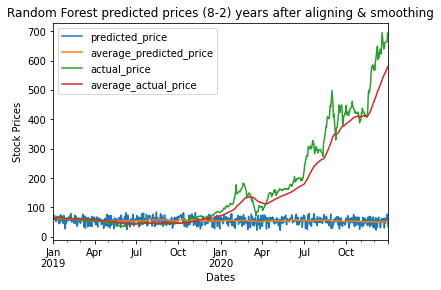

In [ ]:
# Now plotting test predictions after smoothing
predictions_plot = predictions_df.plot(title='Random Forest predicted prices (8-2) years after aligning & smoothing')
predictions_plot.set_xlabel("Dates")
predictions_plot.set_ylabel("Stock Prices")
fig = predictions_plot.get_figure()
fig.savefig("./gdrive/MyDrive/DATA/STOCK/random forest after smoothing.png")

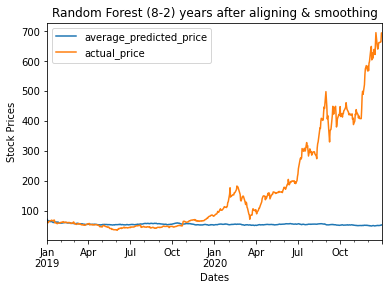

In [ ]:
# Plotting just predict and actual average curves
predictions_df_average = predictions_df[['average_predicted_price', 'actual_price']]
predictions_plot = predictions_df_average.plot(title='Random Forest (8-2) years after aligning & smoothing')
predictions_plot.set_xlabel("Dates")
predictions_plot.set_ylabel("Stock Prices")
fig = predictions_plot.get_figure()
fig.savefig("./gdrive/MyDrive/DATA/STOCK/random forest after smoothing 2.png")

## Logistic Regression approach

### Step 1 - Function for alignment so we can use it for later on iteration

In [ ]:
def offset_value(test_start_date, test, predictions_df):
    temp_date = test_start_date
    average_last_5_days_test = 0
    average_upcoming_5_days_predicted = 0
    total_days = 10
    for i in range(total_days):
        average_last_5_days_test += test.loc[temp_date, 'prices']
        temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
        difference = temp_date + timedelta(days=1)
        temp_date = difference.strftime('%Y-%m-%d')
    average_last_5_days_test = average_last_5_days_test / total_days

    temp_date = test_start_date
    for i in range(total_days):
        average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
        temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
        difference = temp_date + timedelta(days=1)
        temp_date = difference.strftime('%Y-%m-%d')
    average_upcoming_5_days_predicted = average_upcoming_5_days_predicted / total_days
    difference_test_predicted_prices = average_last_5_days_test - average_upcoming_5_days_predicted
    return difference_test_predicted_prices

In [ ]:
df
#df.head()
#df.tail()

,prices,compound,neg,neu,pos
2011-01-04,5,-0.9857,0.135,0.765,0.1
2011-01-05,5,-0.9958,0.192,0.752,0.056
2011-01-06,5,-0.9925,0.183,0.731,0.086
2011-01-07,5,-0.9951,0.209,0.706,0.085
2011-01-08,5,-0.9893,0.162,0.722,0.116
...,...,...,...,...,...
2020-12-27,663,-0.9666,0.145,0.776,0.079
2020-12-28,663,0.0258,0.127,0.75,0.123
2020-12-29,665,-0.9658,0.139,0.788,0.072
2020-12-30,694,-0.9949,0.154,0.784,0.063


In [ ]:
sentiment_score_list

[array([0.129, 0.07 ]),
 array([0.184, 0.057]),
 array([0.18 , 0.066]),
 array([0.16 , 0.074]),
 array([0.179, 0.079]),
 array([0.113, 0.086]),
 array([0.145, 0.082]),
 array([0.138, 0.061]),
 array([0.165, 0.094]),
 array([0.146, 0.057]),
 array([0.177, 0.106]),
 array([0.176, 0.098]),
 array([0.136, 0.079]),
 array([0.141, 0.043]),
 array([0.189, 0.054]),
 array([0.123, 0.092]),
 array([0.159, 0.075]),
 array([0.117, 0.068]),
 array([0.175, 0.065]),
 array([0.205, 0.051]),
 array([0.15 , 0.075]),
 array([0.159, 0.073]),
 array([0.15 , 0.084]),
 array([0.17 , 0.069]),
 array([0.172, 0.082]),
 array([0.168, 0.071]),
 array([0.19 , 0.073]),
 array([0.158, 0.059]),
 array([0.133, 0.102]),
 array([0.148, 0.158]),
 array([0.167, 0.115]),
 array([0.167, 0.115]),
 array([0.187, 0.055]),
 array([0.184, 0.08 ]),
 array([0.134, 0.09 ]),
 array([0.145, 0.079]),
 array([0.131, 0.065]),
 array([0.141, 0.086]),
 array([0.159, 0.051]),
 array([0.22 , 0.104]),
 array([0.16 , 0.088]),
 array([0.147, 0

## Actual implemetation of Logistic regression

test df
            prices compound    neg    neu    pos
2020-11-01     396  -0.9861  0.101  0.864  0.036
2020-11-02     400  -0.9927  0.155  0.741  0.105
2020-11-03     423  -0.9871  0.119  0.791  0.089
2020-11-04     420  -0.9949  0.094  0.848  0.058
2020-11-05     438   0.9621  0.074  0.838  0.088
...            ...      ...    ...    ...    ...
2020-12-27     663  -0.9666  0.145  0.776  0.079
2020-12-28     663   0.0258  0.127   0.75  0.123
2020-12-29     665  -0.9658  0.139  0.788  0.072
2020-12-30     694  -0.9949  0.154  0.784  0.063
2020-12-31     694  -0.9216  0.108  0.815  0.077

[61 rows x 5 columns]
Date : 2020-01-01 00:00:00
Date : 2020-01-02 00:00:00
Date : 2020-01-03 00:00:00
Date : 2020-01-04 00:00:00
Date : 2020-01-05 00:00:00
Date : 2020-01-06 00:00:00
Date : 2020-01-07 00:00:00
Date : 2020-01-08 00:00:00
Date : 2020-01-09 00:00:00
Date : 2020-01-10 00:00:00
Date : 2020-01-11 00:00:00
Date : 2020-01-12 00:00:00
Date : 2020-01-13 00:00:00
Date : 2020-01-14 00:00:00
Dat

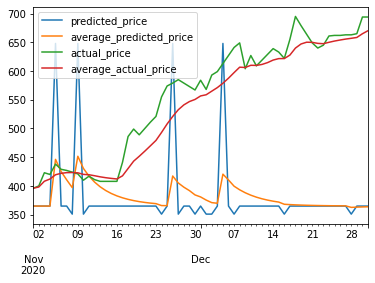

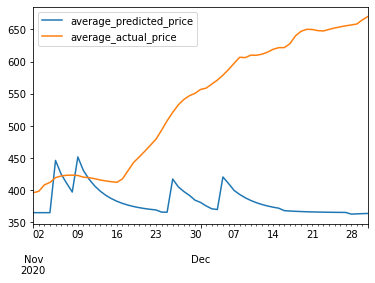

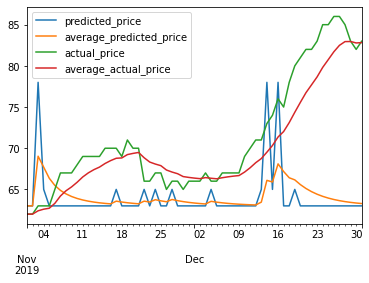

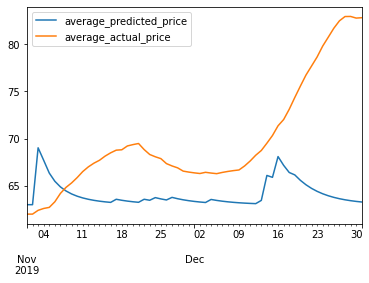

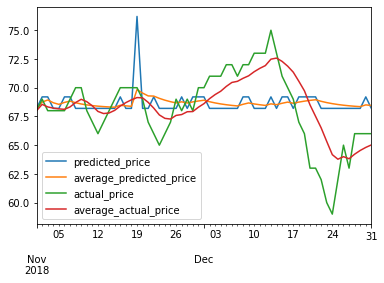

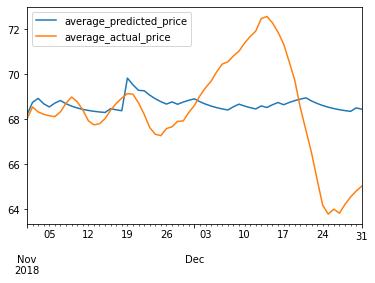

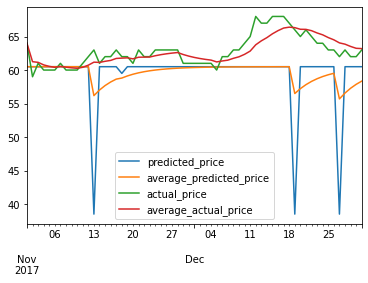

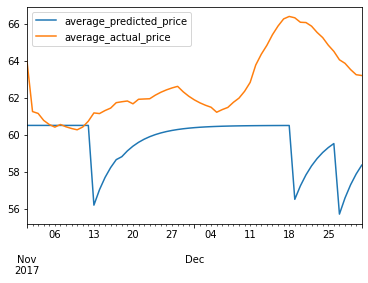

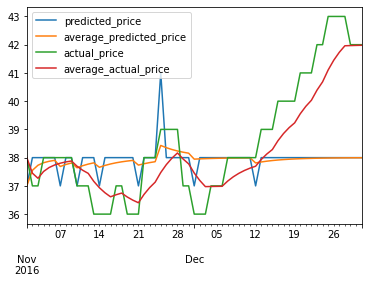

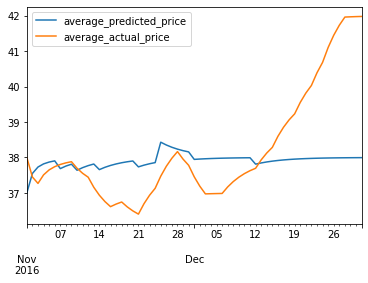

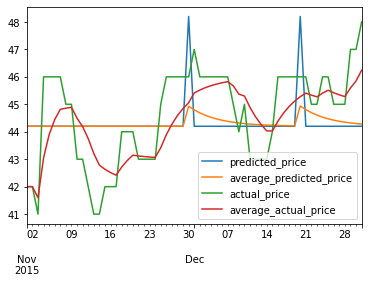

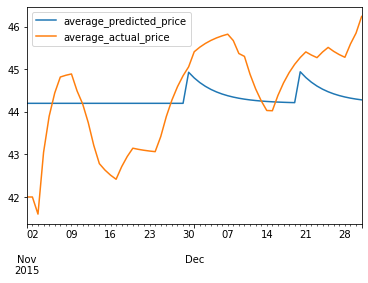

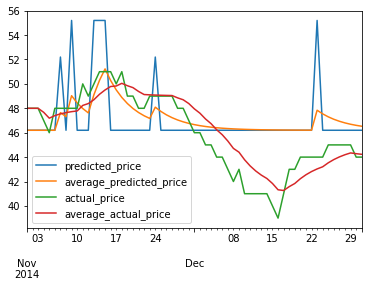

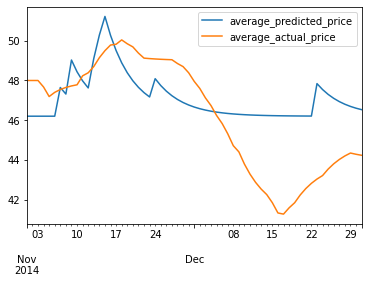

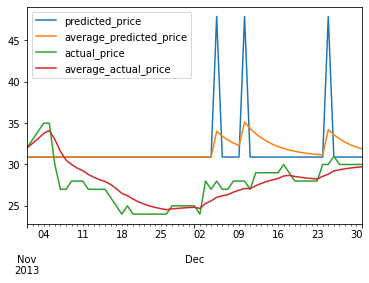

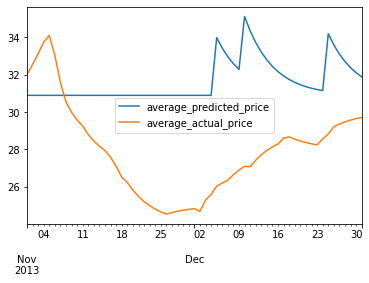

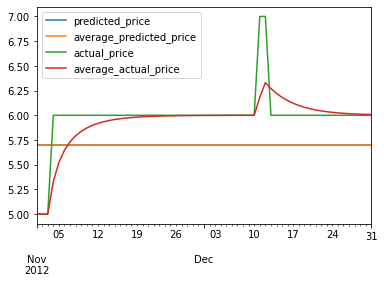

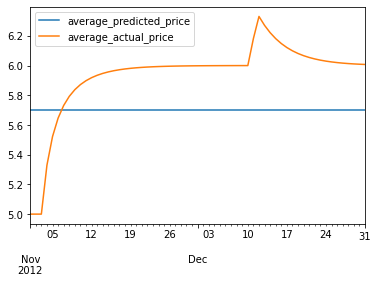

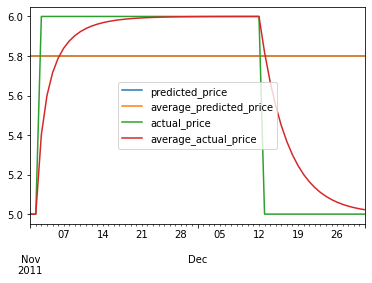

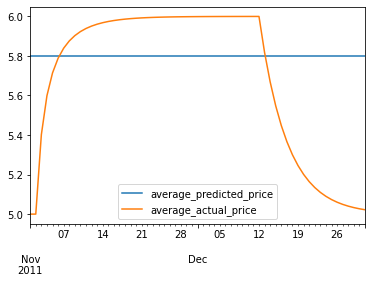

In [ ]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from datetime import datetime, timedelta

years = [2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011]
prediction_list = []
for year in years:
    # Splitting the training and testing data
    train_start_date = str(year) + '-01-01'
    train_end_date = str(year) + '-10-31'
    test_start_date = str(year) + '-11-01'
    test_end_date = str(year) + '-12-31'
    train = df.loc[train_start_date : train_end_date]
    test = df.loc[test_start_date : test_end_date]
    
    print('test df')
    print(test)

    # Calculating the sentiment score
    sentiment_score_list = []
    for date, row in train.T.iteritems():
        print('Date : ' + str(date))
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_train = np.asarray(sentiment_score_list)
    sentiment_score_list = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_test = np.asarray(sentiment_score_list)
    
    # Generating models
    lr = LogisticRegression()

    print('numpy_df_train')
    print(numpy_df_train)

    lr.fit(numpy_df_train, train['prices'])
    
    print('numpy_df_test')
    print(numpy_df_test)

    prediction = lr.predict(numpy_df_test)
    
    prediction_list.append(prediction)
  
    #print train_start_date + ' ' + train_end_date + ' ' + test_start_date + ' ' + test_end_date
    idx = pd.date_range(test_start_date, test_end_date)
    #print year
    predictions_df_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
    
    difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df_list)
    # Adding offset to all the advpredictions_df price values
    predictions_df_list['prices'] = predictions_df_list['prices'] + difference_test_predicted_prices
    predictions_df_list

    # Smoothing the plot
    #predictions_df_list['ewma'] = pd.ewma(predictions_df_list["prices"], span=10, freq="D")
    predictions_df_list['ewma'] = predictions_df_list['prices'].ewm(span=10).mean()
    predictions_df_list['actual_value'] = test['prices']
    #predictions_df_list['actual_value_ewma'] = pd.ewma(predictions_df_list["actual_value"], span=10, freq="D")
    predictions_df_list['actual_value_ewma'] = predictions_df_list['actual_value'].ewm(span=10).mean()
    # Changing column names
    predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
    predictions_df_list.plot()
    predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]
    predictions_df_list_average.plot()
    #print lr.score(numpy_df_test,test['prices'])
    #print lr.score(numpy_df_train, train['prices'])
#     predictions_df_list.show()

In [ ]:
lr.classes_

array([4, 5, 6])

In [ ]:
lr.coef_[0]

array([ 1.84387265e-01,  1.78684336e-01, -1.83241855e-01,  1.84323473e-04])

## Random Forest with Alignment and Smoothing

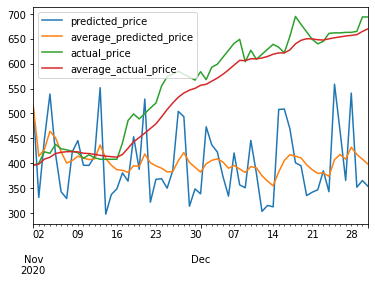

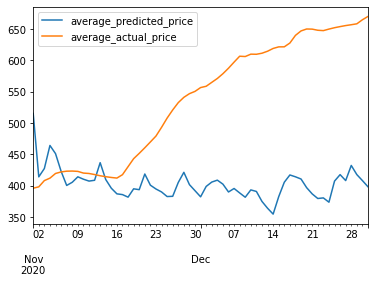

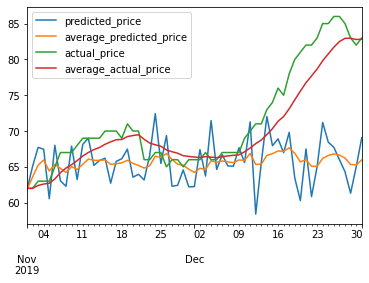

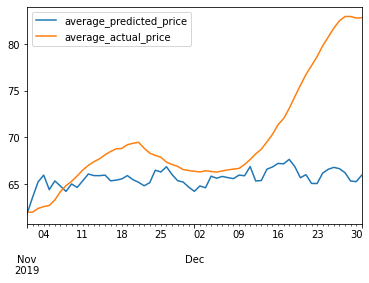

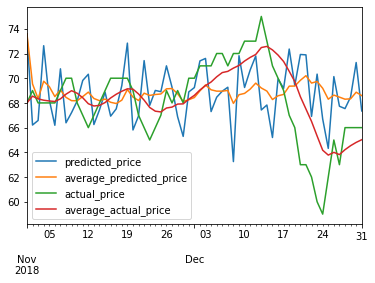

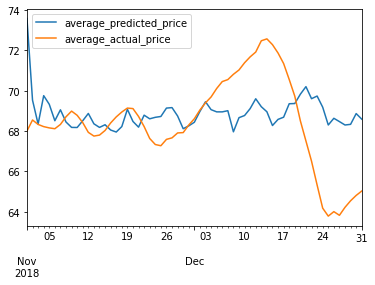

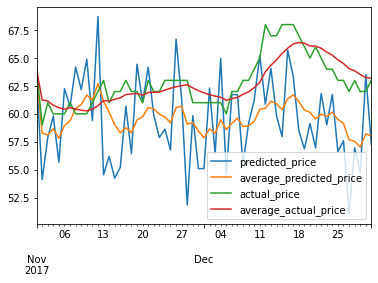

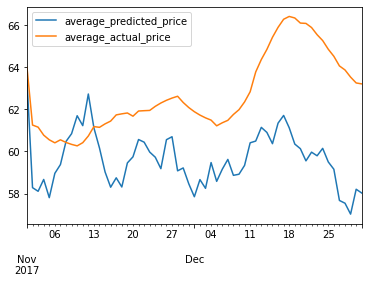

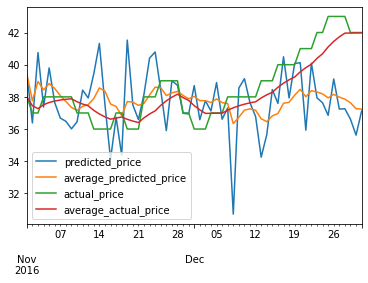

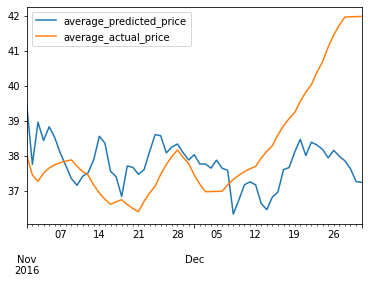

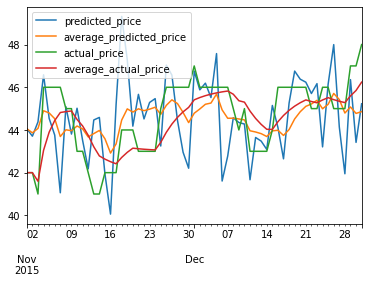

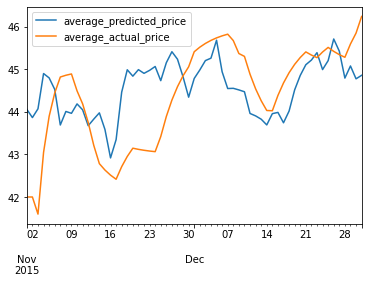

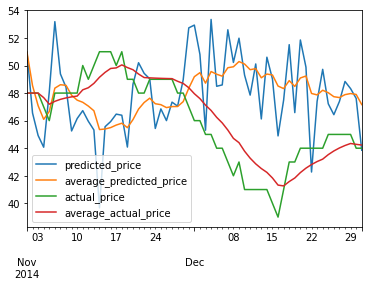

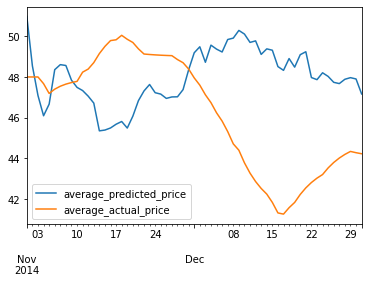

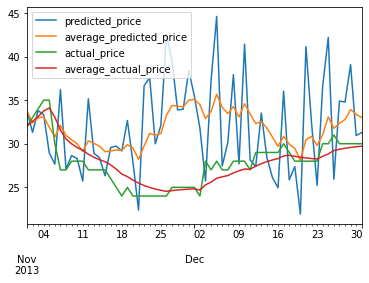

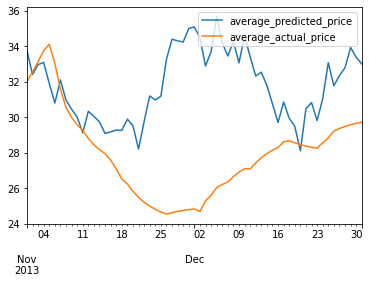

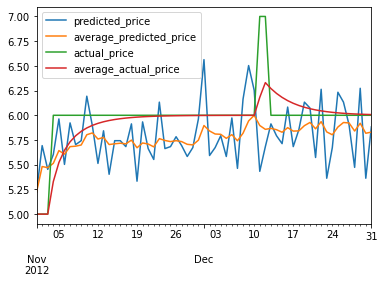

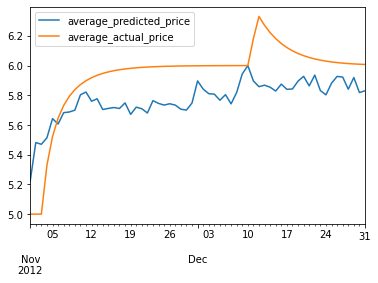

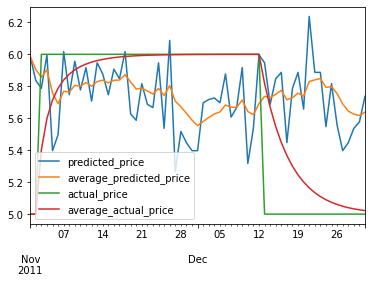

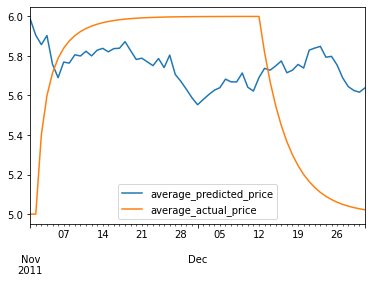

In [ ]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from datetime import datetime, timedelta

# average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
# # Converting string to date time
# temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
# # Adding one day from date time
# difference = temp_date + timedelta(days=1)
# # Converting again date time to string
# temp_date = difference.strftime('%Y-%m-%d')
        
# start_year = datetime.strptime(train_start_date, "%Y-%m-%d").date().month

years = [2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011]
prediction_list = []
for year in years:
    # Splitting the training and testing data
    train_start_date = str(year) + '-01-01'
    train_end_date = str(year) + '-10-31'
    test_start_date = str(year) + '-11-01'
    test_end_date = str(year) + '-12-31'
    train = df.loc[train_start_date : train_end_date]
    test = df.loc[test_start_date:test_end_date]
    
    # Calculating the sentiment score
    sentiment_score_list = []
    for date, row in train.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_train = np.asarray(sentiment_score_list)
    sentiment_score_list = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_test = np.asarray(sentiment_score_list)
    
    # Generating models
    rf = RandomForestRegressor()
    rf.fit(numpy_df_train, train['prices'])
    
    #print rf
    
    prediction, bias, contributions = ti.predict(rf, numpy_df_test)
    prediction_list.append(prediction)
    #print train_start_date + ' ' + train_end_date + ' ' + test_start_date + ' ' + test_end_date
    idx = pd.date_range(test_start_date, test_end_date)
    #print year
    predictions_df_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
    
    difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df_list)
    # Adding offset to all the advpredictions_df price values
    predictions_df_list['prices'] = predictions_df_list['prices'] + difference_test_predicted_prices
    predictions_df_list

    # Smoothing the plot
    #predictions_df_list['ewma'] = pd.ewma(predictions_df_list["prices"], span=10, freq="D")
    predictions_df_list['ewma'] = predictions_df_list['prices'].ewm(span=10).mean()
    predictions_df_list['actual_value'] = test['prices']
    #predictions_df_list['actual_value_ewma'] = pd.ewma(predictions_df_list["actual_value"], span=10, freq="D")
    predictions_df_list['actual_value_ewma'] = predictions_df_list['actual_value'].ewm(span=10).mean()
    # Changing column names
    predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
    predictions_df_list.plot()
    predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]
    predictions_df_list_average.plot()
    
#     predictions_df_list.show()

### 개선접근법의 문제점
- 데이터셋이 정규화되지 않음
- 렌덤 포레스트의 과적합

https://datapedia.tistory.com/10


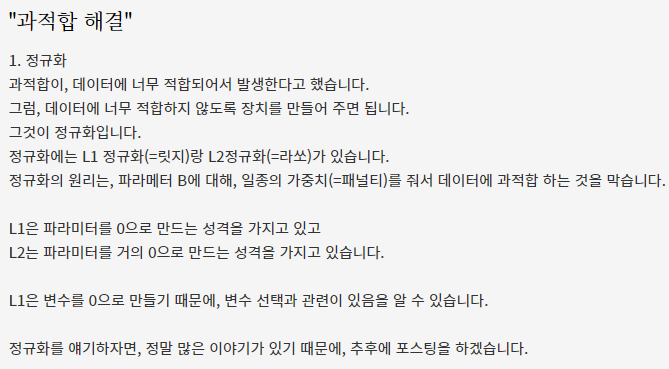

다층 퍼셉트론(multilayer perceptron, MLP)로 문제 해결

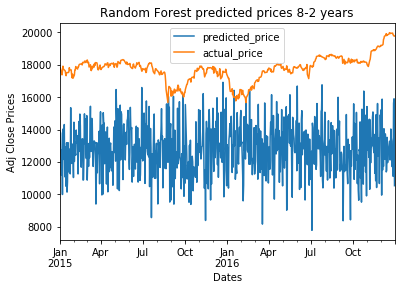


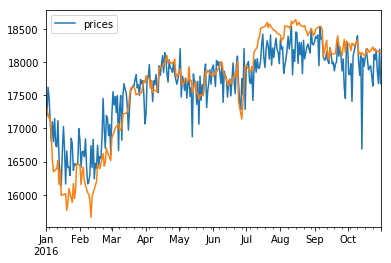